# What is WebScraping

Web scraping, or scraping data from a website, is an automatic method to obtain large amounts of data from websites. It is one of the most efficient and useful ways to extract data from a website, especially in 2023. It has become an integral tool for many businesses and individuals due to its ability to quickly and efficiently gather information from the internet. 

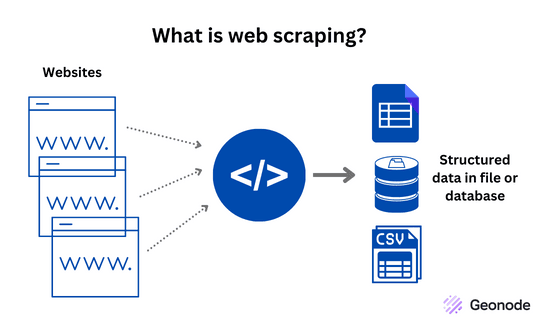

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
# link to scrape
link = 'https://en.wikipedia.org/wiki/Biryani'

In [5]:
def get_wiki_data(link: str) -> None:
    """
    This function retrieves and prints the title and paragraphs from a Wikipedia page.

    Parameters:
    link (str): The URL of the Wikipedia page to scrape.

    Returns:
    None: The function prints the title and paragraphs to the console.
    """
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract and print the title of the Wikipedia page
    header = soup.find(id='firstHeading')
    print(header.get_text())

    # Extract and print all paragraphs from the Wikipedia page
    paragraph = soup.find_all('p')
    for para in paragraph:
        print(para.get_text())

In [6]:
get_wiki_data(link)

Biryani


Biryani (/bɜːrˈjɑːni/) is a mixed rice dish, mainly popular in South Asia. It is made with rice, some type of meat (chicken, goat, pork, lamb, beef, prawn, or fish) and spices. To cater to vegetarians, in some cases, it is prepared by substituting vegetables or paneer for the meat.[1] Sometimes eggs and/or potatoes are also added.[2]

Biryani is one of the most popular dishes in South Asia and among the South Asian diaspora, although the dish is often associated with the region's Muslim population in particular.[3] Similar dishes are also prepared in other parts of the world such as in Iraq, Myanmar, Thailand, and Malaysia.[4] Biryani is the single most-ordered dish on Indian online food ordering and delivery services, and has been labelled as the most popular dish overall in India.[3][5]

One theory states that it originated from birinj (Persian: برنج), the Persian word for rice.[6][7] Another theory states that it is derived from biryan or beriyan (Persian: بریان), which me

# Scraping from Amazon

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define headers for the HTTP request
HEADERS = {
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
 'Accept-Language': 'en-US, en;q=0.5'
}

# Function to get HTML content from a URL
def get_html_content(url):
 response = requests.get(url, headers=HEADERS)
 response.raise_for_status()
 return response.text

# Function to parse the HTML and extract customer names and reviews
def scrape_amazon_reviews(url):
 html_content = get_html_content(url)
 soup = BeautifulSoup(html_content, 'html.parser')

 # Extract customer names
 customer_names = [item.get_text() for item in soup.find_all("span", class_="a-profile-name")]

 # Extract customer reviews
 reviews = [item.get_text().strip() for item in soup.find_all("div", class_="a-expander-content reviewText review-text-content a-expander-partial-collapse-content")]

 # Ensure both lists are of the same length
 min_length = min(len(customer_names), len(reviews))
 customer_names = customer_names[:min_length]
 reviews = reviews[:min_length]

 return customer_names, reviews

# URL of the product
url = 'https://www.amazon.in/Samsung-Convection-Microwave-MC28A5013AK-TL/dp/B09XBMXQ34/?_encoding=UTF8&ref_=pd_hp_d_btf_ls_gwc_pc_en2_'
# Scrape the reviews and save to CSV
customer_names, reviews = scrape_amazon_reviews(url)

# Save the details into a CSV file
df = pd.DataFrame({'Name': customer_names, 'Review': reviews})
df.to_csv('amazon_review.csv', index=False)

print("Data has been successfully scraped and saved to 'amazon_review.csv'.")

Data has been successfully scraped and saved to 'amazon_review.csv'.
